In [3]:
import numpy as np
import pandas as pd
import math
from sklearn.preprocessing import MinMaxScaler
from sklearn.cluster import DBSCAN
from sklearn.neighbors import KDTree
import statistics as stat
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

In [4]:
student = pd.read_csv('7.csv')
student.describe()

filter_data = student[student['Valid'] ==1]
filter_data = filter_data.drop('Valid', 1)
    
    #filter_data = data_pr149[data_pr149['QuestionId'] ==1]

filter_data['FpogX'] = filter_data['FpogX']*1920
filter_data['FpogY'] = filter_data['FpogY']*1080
filter_data.describe()
    
diff_x = np.diff(filter_data['FpogX'])
diff_y = np.diff(filter_data['FpogY'])
filter_data.drop(filter_data.tail(1).index,inplace=True)
filter_data.insert(4,'sd',np.sqrt(np.power(diff_x,2) + np.power(diff_y,2)))

sa = np.arctan2(diff_x,diff_y);
sa_deg = []
for j in sa:
    sa_deg.append(math.degrees(j))

filter_data.insert(5,'sa',sa_deg)
    
directions = []
for j in filter_data['sa']:
    if j < 135 and j >=45:
        directions.append('a')
    elif (j< 45 and j>=0) or (j >=-45 and j<0):
        directions.append('b')
    elif j>= -135 and j<-45:
        directions.append('c')
    elif (j<-135 and j >=-180) or (j >=135 and j<=180):
        directions.append('d')
    else :
        print(i);

filter_data.insert(6,'Direction',directions)

filter_data


,QuestionId,Time,FpogX,FpogY,sd,sa,Direction
0,0,5845.72412,898.9056,562.5180,1.058092,11.513831,b
1,0,5845.74023,899.1168,563.5548,1.171442,9.433375,b
2,0,5845.75684,899.3088,564.7104,2.211842,-36.795294,b
3,0,5845.77295,897.9840,566.4816,2.466706,58.892837,a
4,0,5845.78955,900.0960,567.7560,1.982028,73.539985,a
...,...,...,...,...,...,...,...
11697,20,6037.89307,1467.4176,1008.5256,1.665988,-101.593212,c
11698,20,6037.90918,1465.7856,1008.1908,1.429451,-101.328798,c
11699,20,6037.92529,1464.3840,1007.9100,1.073651,-59.135086,c
11700,20,6037.94287,1463.4624,1008.4608,1.926646,-67.940145,c


In [15]:
uniques = []
arr = []
for j in range(1,20):
    q1 = filter_data[filter_data['QuestionId'] ==j]['Direction'];
    #q1 = getMA(filter_data[filter_data['QuestionId'] ==j])
    #display(q1)
    ds = [];
    last = '/'
    
    for i in q1:
        if i != last:
            ds.append(i);
        last = i
    temp = top_k(ds,2)
   
    arr.append(temp)
    for i in temp:
        uniques.append(i)
                   
uniques =np.unique(uniques)

res = []
arr2 = []
for i in range(0,len(arr)):
    for j in uniques:
        if j in arr[i]:
            res.append(1)
        else:
            res.append(0)
        
    arr2.append(res)
    res = []
print(arr2)
sums = []
for i in arr2:
    sum = 0;
    for j in range(0,len(i)):
        if i[j] == 1:
            sum +=j
    sums.append(sum)
    
sums

[[1, 0, 1, 1], [0, 1, 1, 1], [0, 1, 1, 1], [1, 1, 0, 1], [1, 0, 1, 1], [1, 1, 0, 1], [1, 1, 1, 0], [1, 1, 0, 1], [1, 1, 0, 1], [1, 0, 1, 1], [1, 1, 0, 1], [0, 1, 1, 1], [1, 1, 1, 0], [1, 1, 0, 1], [1, 0, 1, 1], [0, 1, 1, 1], [1, 1, 0, 1], [0, 1, 1, 1], [1, 1, 1, 0]]


[5, 6, 6, 4, 5, 4, 3, 4, 4, 5, 4, 6, 3, 4, 5, 6, 4, 6, 3]

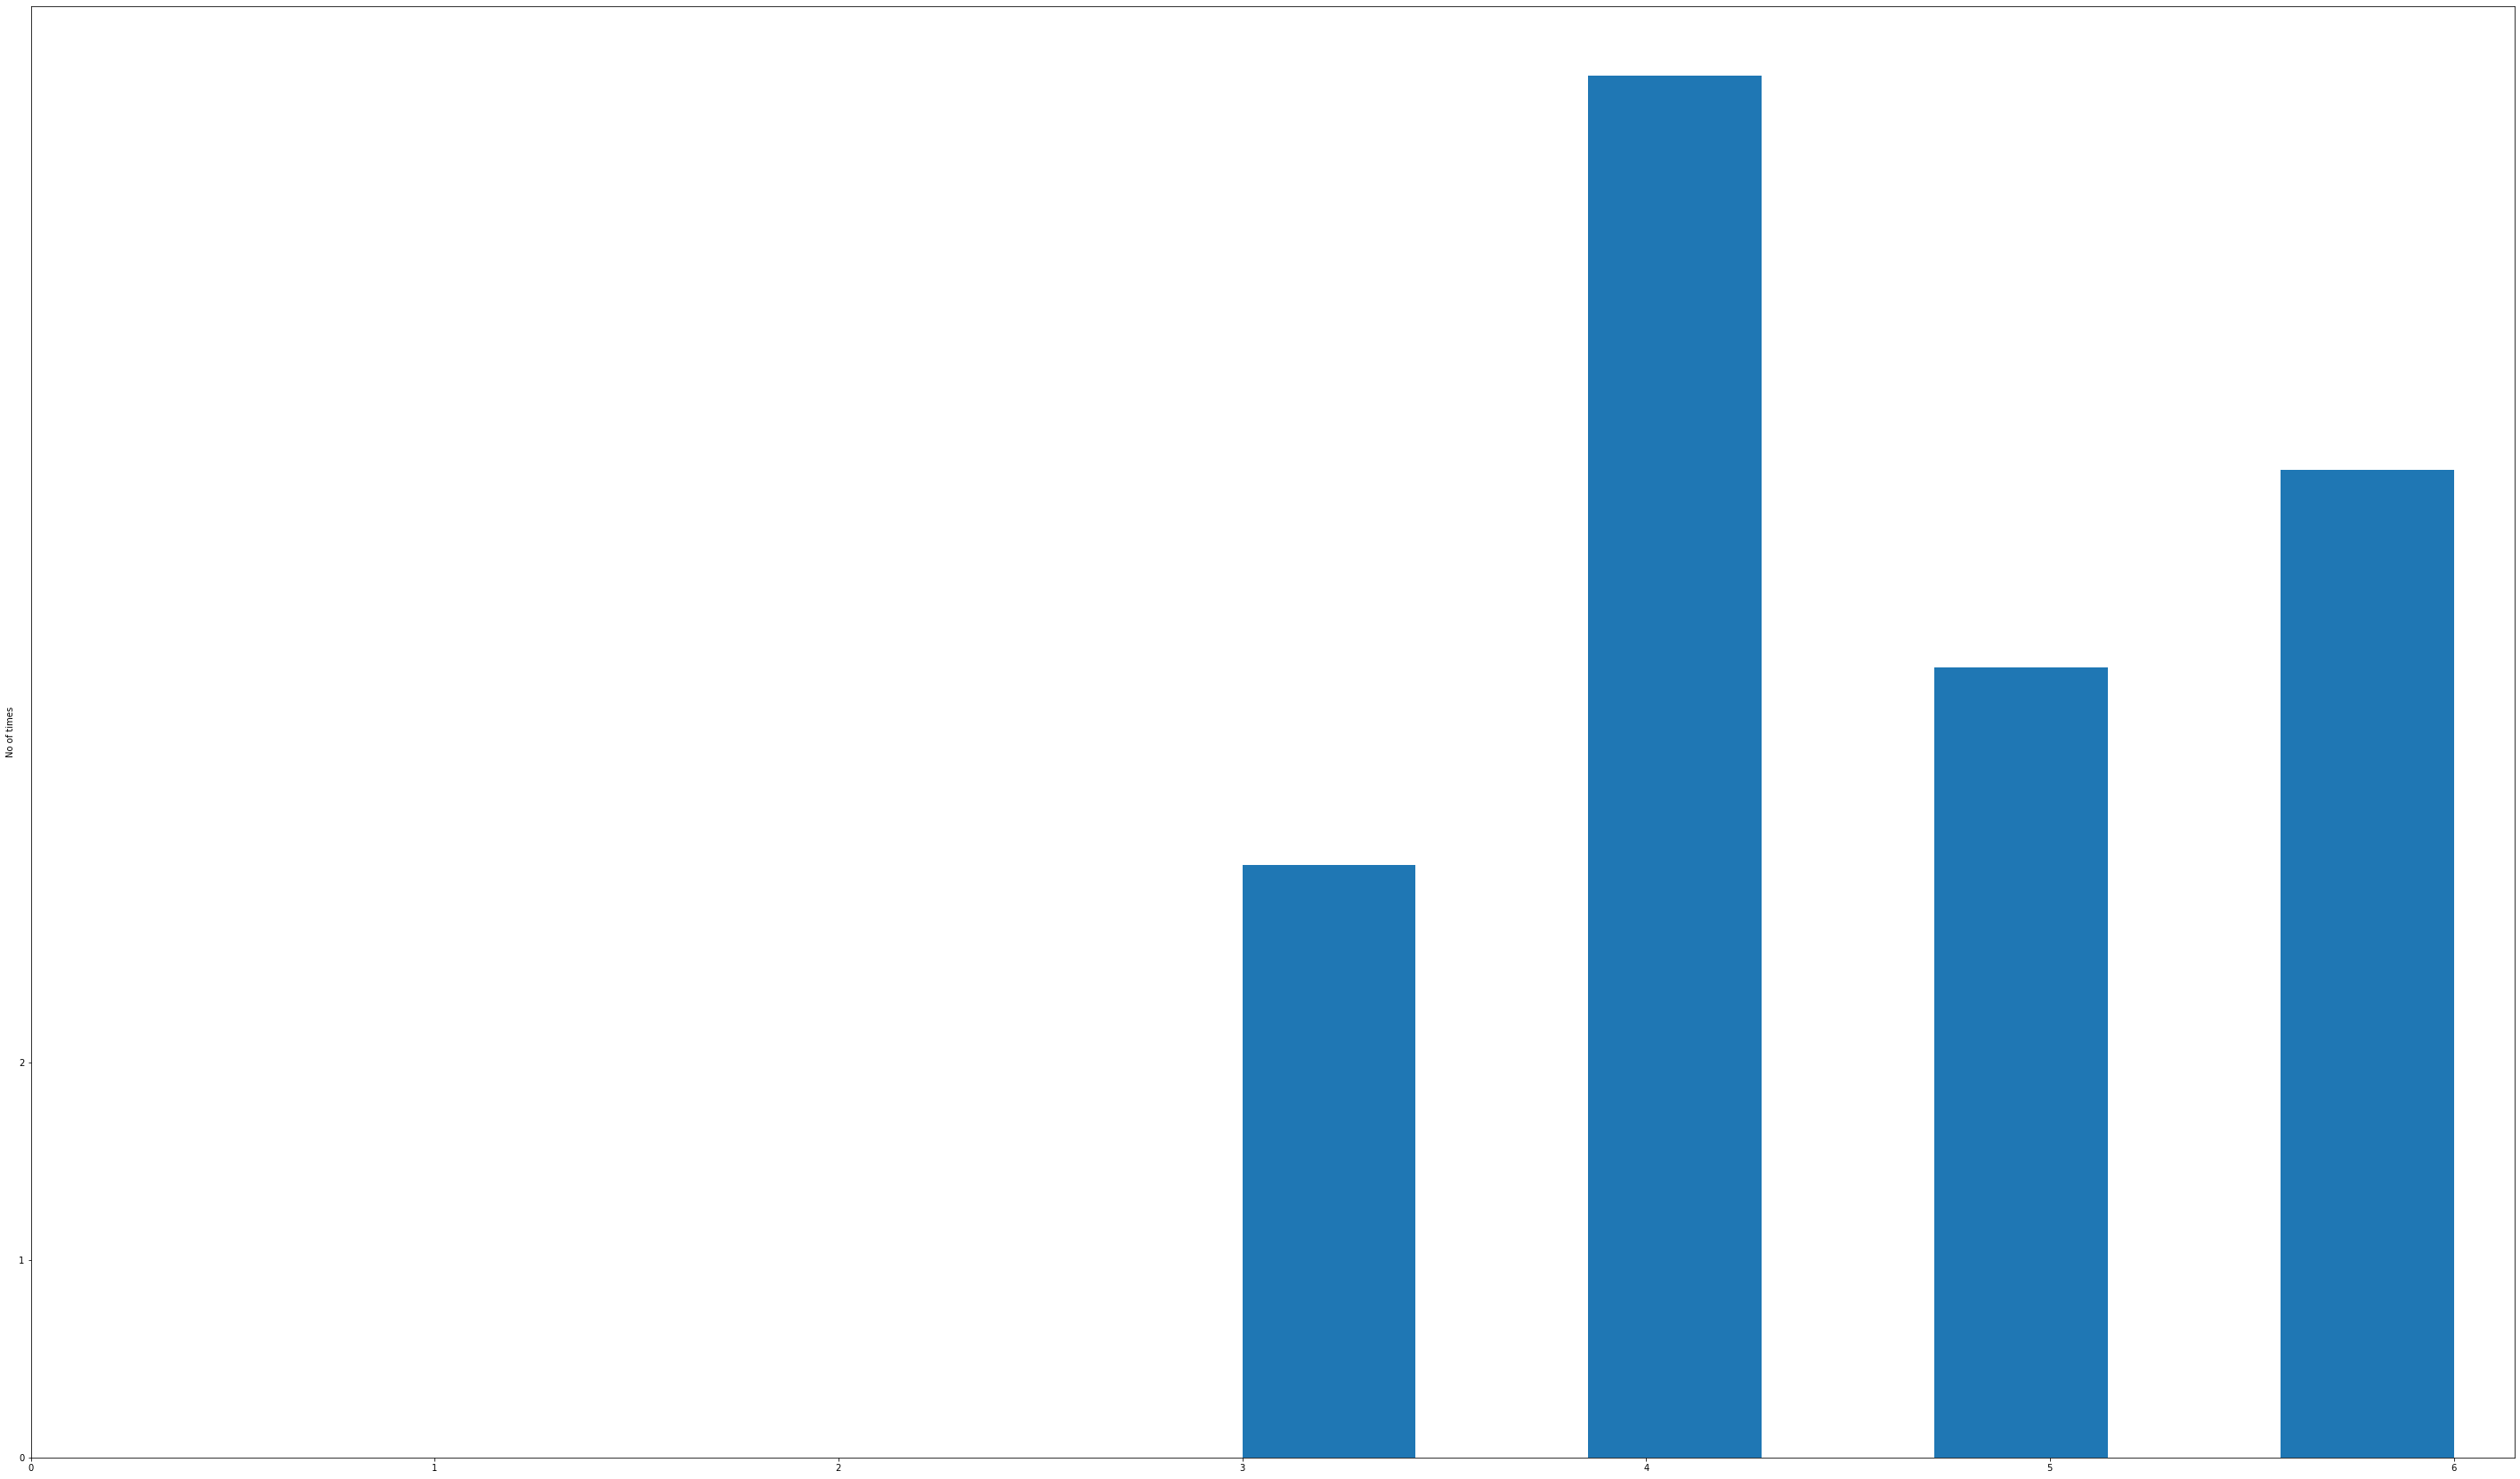

In [16]:
plt.figure(figsize=(50,30))
plt.hist(sums, bins=max(sums)+1)
plt.ylabel('No of times')
plt.xticks(np.arange(0, max(sums)+1, step=1));
plt.yticks(np.arange(0, 3, step=1));
plt.show()

In [14]:
def top_k(MA, alfa):
    MAsub = []
    sequencelist = []
    FMA = []
    MAfreqsub = []
    cnt = 0;
    for i in range(1,alfa):
        for j in range(0,len(MA)-alfa):

            temp = ''.join(MA[j:j+i]);
            if  temp in sequencelist:
                   cnt =cnt
            else:
                MAsub.append(temp)
                sequencelist.append( MAsub[-1]);
                cnt=cnt+1;
                MAfreqsub.append(isSubArray(MA,MAsub[-1],len(MA),len(MAsub[-1]))*len(MAsub));

    for i in range(0,len(MAsub)-1):
        for j in range(i+1,len(MAsub)):
            if MAfreqsub[i] < MAfreqsub[j]:
                temp = MAfreqsub[i]
                MAfreqsub[i] = MAfreqsub[j]
                MAfreqsub[j] = temp
                temp = MAsub[i]
                MAsub[i] = MAsub[j]
                MAsub[j] = temp

    return MAsub[0:3]

In [7]:
def isSubArray(A, B, n, m): 
    cnt= 0;
    # Two pointers to traverse the arrays 
    i = 0
    j = 0
  
    # Traverse both arrays simultaneously 
    while (i < n and j < m): 
          
        # If element matches increment  
        # both pointers 
        if (A[i] == B[j]): 
            i += 1
            j += 1
  
            # If array B is completely 
            # traversed 
            if (j == m): 
                cnt+=1;
                i += 1
                j = 0
      
        # If not, increment i and reset j 
        else: 
            i += 1
            j = 0
  
    return cnt

In [8]:
def getMA(filter_data):
    ds = []
    flag = -1;
    directions = filter_data['Direction']
    
    i =0
    for direction in directions:
        x = filter_data.iloc[i,2]
        y = filter_data.iloc[i,3]
        sd = filter_data.iloc[i,4]

        if x > 625.0 and x < 1289.0 and y > 112.0 and y < 175.0:
            if flag != 1:
                ds.append(direction)
                flag = 1;
        elif x > 223.0 and x < 708.0 and y > 210.0 and y < 482.0:
            if flag != 2:
                ds.append(direction)
                flag = 2; 
        elif x > 223.0 and x < 708.0 and y > 498.0 and y < 585.0:
            if flag != 3:
                ds.append(direction)
                flag = 3;
        elif x > 1234.0 and x < 1719.0 and y > 210.0 and y < 482.0:
            if flag != 4:
                ds.append(direction)
                flag = 4;
        elif x > 1234.0 and x < 1719.0 and y > 498.0 and y < 585.0:
            if flag != 5:
                flag = 5;
                ds.append(direction)
        elif x > 223.0 and x < 708.0 and y > 596.7 and y < 919.0:
            if flag != 6:
                flag = 6;
                ds.append(direction)
        elif x > 223.0 and x < 708.0 and y > 925.0 and y < 1010.96:
            if flag != 7:
                flag = 7;
                ds.append(direction)
        elif x > 1234.0 and x < 1719.0 and y > 597.0 and y < 919.0:
            if flag != 8:
                flag = 8;
                ds.append(direction)
        elif x > 1234.0 and x < 1719.0 and y > 925.0 and y < 1011.0:
            if flag != 9:
                flag = 9;
                ds.append(direction)
        i+=1
    return ds
